#**Pneumonia Capstone project**

##**PROBLEM STATEMENT**

###**DOMAIN**: *Health Care*

###**CONTEXT**:

Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation of  the  lungs.  In  this  challenge,  you’re  required  to  build  an  algorithm  to  detect  a  visual  signal  for  pneumonia  in  medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.•DATA DESCRIPTION:- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. - Dataset has been attached along with this project. Please use the same for this capstone project.- Original  link  to  the  dataset  : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data[  for  your  reference only ]. You can refer to the details of the dat aset in the above link- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.•PROJECT

###**OBJECTIVE**: Design a DL based algorithm for detecting pneumonia.

###**PROJECT TASK**: [Score: 100 points]
1.**Milestone 1**:[ Score: 40 points]

*  Input: Context and Dataset‣Process:
      *  Step 1: Import the data. [ 3 points ]
      *  Step 2: Map training and testing images to its classes. [ 4 points ]
      *  Step 3: Map training and testing images to its annotations. [ 4 points ]
      *  Step 4: Preprocessing and Visualisation of different classes [4 Points]
      *  Step 5: Display images with bounding box. [ 5 points ]
      *  Step 6: Design, train and test basic CNN models for classification. [ 10 points ]
      *  Step 7: Interim report [ 10 points ]
      *  Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1
      
2. **Milestone 2**: [ Score: 60 points]

*  Input: Preprocessed output from Milestone-1

      *  Step 1: Fine tune the trained basic CNN models for classification. [ 5 points ]
      *  Step 2: Apply Transfer Learning model for classification [4 points]
      *  Step  3:  Design,  train  and  test  RCNN  &  its  hybrids  based  object  detection  models  to  impose  the  bounding  box  or mask over the area of interest. [ 8 points ]
      *  Step 4: Pickle the model for future prediction [ 3 Points]
      *  Step 5: Final Report [40 Points]
      *  Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2
      
3. **Milestone 3**: [ Optional ]

      *  Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input image
      *  Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface
      
####**References and hints:**

*  Please refer to the blog to understand the basics of object detection: https://www.mygreatlearning.com/blog/object-detection-using-tensorflow/ *  YOLO object detection using OpenCV: https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/?highlight=detection‣Classification and object detection: https://www.mygreatlearning.com/blog/cnn-model-architectures-and-applications/‣To make GUI as a desk app you   can use TKINTER library. You are free to use any other library.  
*  To make web service GUI you can use FLASK or DJANGO library.




## Milestone 1

# Loading the dataset

In [3]:
#connect to google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the necessary Libraries

In [4]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

# Exploratory Data Analysis

### Reading the labels from CSV files

In [5]:
# Reading the labels from CSV files
# Assuming the shared file path is correct and accessible
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_detailed_class_info.csv')
data.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [6]:
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_labels.csv")
class_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_detailed_class_info.csv")

df = pd.merge(labels, class_info, on="patientId", how="left")
df.sample(10)

,patientId,x,y,width,height,Target,class
6612,403c8a04-cba6-43d3-a5bb-37a86c1a24fe,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
13637,72a10e64-2d93-4b61-8b90-8efef7284ced,601.0,246.0,179.0,413.0,1,Lung Opacity
22666,ace3688f-2479-4468-9759-1e9a1fe02d6f,340.0,531.0,117.0,72.0,1,Lung Opacity
11399,63450918-0bbe-43ac-9d0f-22bed387dfdb,139.0,577.0,229.0,237.0,1,Lung Opacity
17577,8c07ec1c-76d2-459d-ad7e-7b3e198affb8,52.0,476.0,273.0,234.0,1,Lung Opacity
28081,c7f36a75-af17-4516-bfea-05fd6262da4a,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
33135,ed20cdc6-e8f7-4551-a8d5-6b360b3f9c71,245.0,315.0,145.0,290.0,1,Lung Opacity
27696,c5249000-7193-4697-99b6-de57a2a97a6e,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
23869,b261b9bd-4ff0-4fb9-a1f4-c7d44a2e45c9,584.0,485.0,279.0,271.0,1,Lung Opacity
18989,94cfda4f-e0b9-40cb-b489-2630f6ed45f2,NaN,NaN,NaN,NaN,0,Normal


In [7]:
print("NaN rows:", df['class'].isna().sum())

NaN rows: 0


Total Images: 26684
Total Rows: 37629


/tmp/ipython-input-2516065533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='Set2')


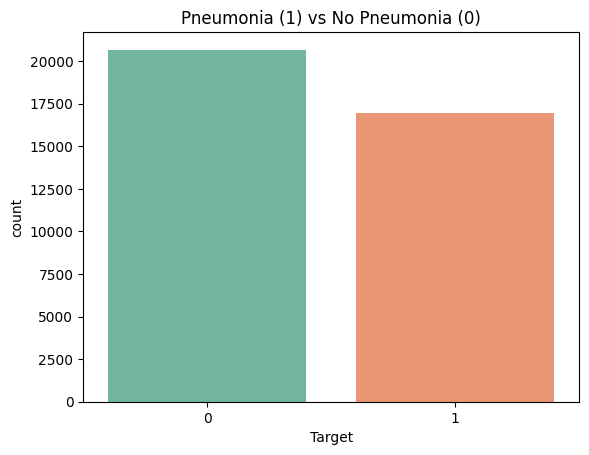

Patients with Pneumonia: 6012
Patients without Pneumonia: 20672


In [8]:
print("Total Images:", df['patientId'].nunique())
print("Total Rows:", df.shape[0])
# Plot target distribution
sns.countplot(data=df, x='Target', palette='Set2')
plt.title('Pneumonia (1) vs No Pneumonia (0)')
plt.show()
# Unique patientId per class
print("Patients with Pneumonia:", df[df['Target']==1]['patientId'].nunique())
print("Patients without Pneumonia:", df[df['Target']==0]['patientId'].nunique())

Above analysis shows arounr 6012 patients are detected with Pneumonia and 20672 patients are detected without Pneumonia

In [9]:
# Milestone 1, Step 2: Map training and testing images to its classes

print("### Milestone 1, Step 2: Mapping Images to Classes ###\n")

# Create a consolidated DataFrame with one row per patient and their final class
patient_to_class = labels.groupby('patientId')['Target'].max().reset_index()
patient_to_class['class'] = patient_to_class['Target'].apply(lambda x: 'Lung Opacity' if x == 1 else 'Normal/Not Normal/No Lung Opacity')


print("--- Sample of Patient-to-Class Mapping ---")
print(patient_to_class.head())
print("\n--- Class Distribution from Mapping ---")
print(patient_to_class['class'].value_counts())

### Milestone 1, Step 2: Mapping Images to Classes ###

--- Sample of Patient-to-Class Mapping ---
                              patientId  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0   
1  000924cf-0f8d-42bd-9158-1af53881a557       0   
2  000db696-cf54-4385-b10b-6b16fbb3f985       1   
3  000fe35a-2649-43d4-b027-e67796d412e0       1   
4  001031d9-f904-4a23-b3e5-2c088acd19c6       1   

                               class  
0  Normal/Not Normal/No Lung Opacity  
1  Normal/Not Normal/No Lung Opacity  
2                       Lung Opacity  
3                       Lung Opacity  
4                       Lung Opacity  

--- Class Distribution from Mapping ---
class
Normal/Not Normal/No Lung Opacity    20672
Lung Opacity                          6012
Name: count, dtype: int64


In [10]:
# --- Step 3: Map training and testing images to its annotations ---

print("\\n### Milestone 1, Step 3: Mapping Images to Annotations ###\\n")

# Filter the DataFrame to only include rows where pneumonia was detected (Target == 1)
# These rows contain the bounding box annotations.
annotations_df = labels[labels['Target'] == 1].copy()

# The columns 'x', 'y', 'width', 'height' already represent the annotations.
# We can select these columns for clarity.
annotations_df = annotations_df[['patientId', 'x', 'y', 'width', 'height']]

print("--- Sample of Patient-to-Annotation Mapping ---")
# Display the first few rows of the annotations mapping
print(annotations_df.head())

print(f"\\nTotal number of bounding box annotations found: {len(annotations_df)}")

\n### Milestone 1, Step 3: Mapping Images to Annotations ###\n
--- Sample of Patient-to-Annotation Mapping ---
                               patientId      x      y  width  height
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0
14  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  322.0   94.0   135.0
\nTotal number of bounding box annotations found: 9555


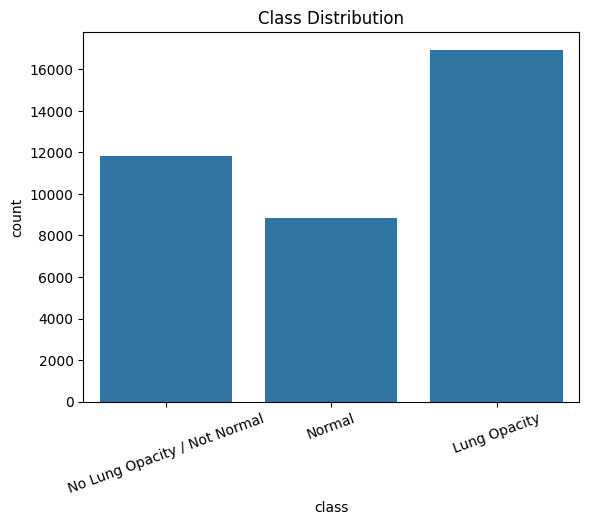

In [11]:
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xticks(rotation=20)
plt.show()

Above plot shows the distribution of the Lung opacity categories with Normal, Not Normal, Lung Opacity

In [12]:
# Filter the DataFrame to include only rows where the 'Target' column is equal to 1
df_target_1 = df[df['Target'] == 1]

# Select the columns 'x', 'y', 'width', and 'height' from the filtered DataFrame
bbox_data = df_target_1[['x', 'y', 'width', 'height']]

# Calculate and print descriptive statistics
print("Descriptive statistics for bounding box parameters (Target=1):")
display(bbox_data.describe())

Descriptive statistics for bounding box parameters (Target=1):


,x,y,width,height
count,16957.000000,16957.000000,16957.000000,16957.000000
mean,398.980008,360.443121,219.266675,337.799552
std,204.869392,149.202409,59.195268,158.986899
min,2.000000,2.000000,40.000000,45.000000
25%,209.000000,243.000000,178.000000,210.000000
50%,343.000000,355.000000,218.000000,309.000000
75%,596.000000,472.000000,259.000000,452.000000
max,835.000000,881.000000,528.000000,942.000000


## Visualize bounding box features

### Subtask:
Create visualizations (histograms, box plots) to understand the spread and typical values of the bounding box features.


**Reasoning**:
Create histograms and box plots for the bounding box features to visualize their distributions and identify outliers.



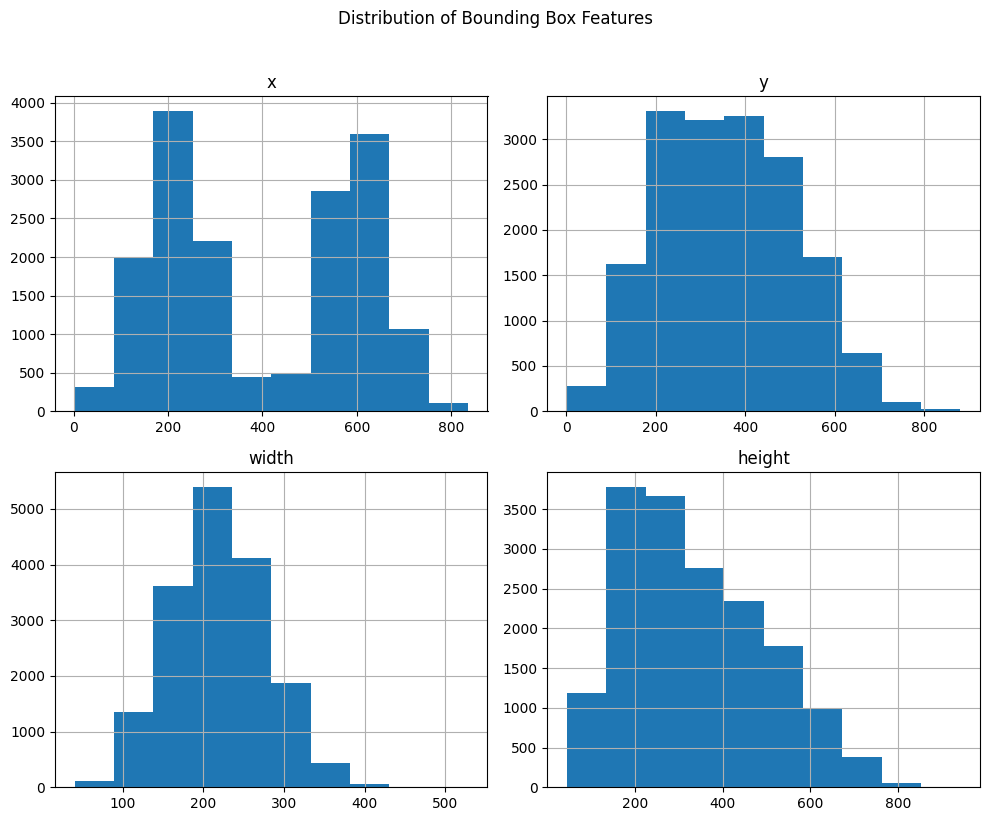

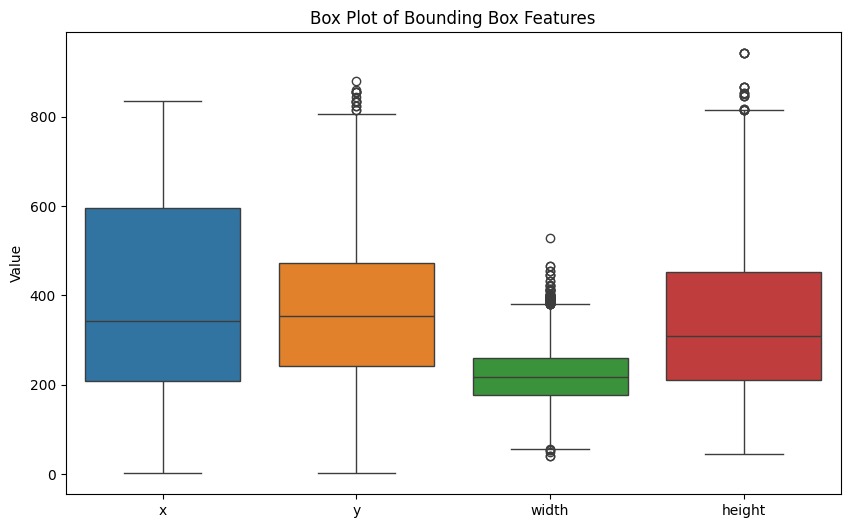

In [13]:
# Create histograms for the bounding box features
bbox_data.hist(figsize=(10, 8))
plt.suptitle('Distribution of Bounding Box Features', y=1.02)
plt.tight_layout()
plt.show()

# Create box plots for the bounding box features
plt.figure(figsize=(10, 6))
sns.boxplot(data=bbox_data)
plt.title('Box Plot of Bounding Box Features')
plt.ylabel('Value')
plt.show()

## Analyze relationship between bounding box features and target

### Subtask:
Investigate if there are any noticeable patterns or relationships between the bounding box dimensions and the `Target` variable.


**Reasoning**:
Group the DataFrame by 'Target' and calculate the mean of the bounding box features for each group, then print the result.



In [14]:
# Group the DataFrame by the 'Target' column and calculate the mean of the bounding box features
mean_bbox_by_target = df.groupby('Target')[['x', 'y', 'width', 'height']].mean()

# Print the resulting grouped data
print("Mean bounding box dimensions by Target:")
display(mean_bbox_by_target)

Mean bounding box dimensions by Target:


,x,y,width,height
Target,,,,
0,NaN,NaN,NaN,NaN
1,398.980008,360.443121,219.266675,337.799552


# Summary of Exploratory Data Analysis:

1. Descriptive Statistics of Bounding Box Features (Target=1):
Based on the descriptive statistics, for images with 'Target' equal to 1, the bounding boxes have an average x-coordinate of around 398.98, an average y-coordinate of around 360.44, an average width of around 219.27, and an average height of around 337.80.
The standard deviations indicate the variability in these dimensions.

2. Distributions of Bounding Box Features:
The histograms show the frequency distribution of x, y, width, and height.
The box plots visualize the spread of the data and highlight potential outliers.
The distributions appear to be somewhat skewed for some features, and there are noticeable outliers in the box plots, particularly for height and width.

3. Relationship between Bounding Box Features and Target:
The analysis clearly shows that bounding box data is primarily associated with images where 'Target' is 1 (pneumonia).
Images with 'Target' 0 (no pneumonia) do not have bounding box information, resulting in NaN values for bounding box features in those cases.
The mean bounding box dimensions for 'Target' 1 are approximately: x=398.98, y=360.44, width=219.27, height=337.80.

Concise Summary of EDA:
The exploratory data analysis revealed that bounding box information is exclusively present for images diagnosed with pneumonia (Target=1).
For these cases, the bounding boxes show variability in their position and size, with average dimensions indicating a typical region of interest for pneumonia.
Visualizations highlighted the distributions and presence of outliers in the bounding box parameters.

## Summary:

### Data Analysis Key Findings

*   For images with `Target` equal to 1 (pneumonia cases), there are 16957 bounding box entries.
*   The average bounding box for `Target=1` images is centered around an x-coordinate of approximately 398.98 and a y-coordinate of approximately 360.44.
*   The average width of bounding boxes for `Target=1` images is about 219.27, and the average height is about 337.80.
*   Bounding box data is primarily associated with images where `Target` is 1 (pneumonia). Images with `Target` 0 (no pneumonia) do not have bounding box information, resulting in `NaN` values for bounding box features in those cases.
*   Visualizations (histograms and box plots) show the frequency distribution and spread of the bounding box features. The distributions appear somewhat skewed for some features, and there are noticeable outliers in the box plots, particularly for height and width.

### Insights or Next Steps

*   The strong association of bounding boxes with `Target=1` indicates that bounding boxes likely delineate the regions of interest (pneumonia) within the images.
*   Investigating the nature and impact of the outliers in bounding box dimensions, especially height and width, could be a valuable next step for potential data cleaning or preprocessing before model training.


In [15]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 94.3 MB/s eta 0:00:00


In [16]:
import pydicom

In [17]:
# 1. Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/Capstone Project/stage_2_train_images.zip'

# 2. Specify the directory to extract the contents
extract_dir = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_images'

# 3. Set the expected number of files after extraction
expected_file_count = 26684

# --- Conditional Unzipping Logic ---
# Check if the extraction directory already exists and has enough files
if os.path.isdir(extract_dir) and len(os.listdir(extract_dir)) >= expected_file_count:
    print(f"Directory '{extract_dir}' already exists and contains {len(os.listdir(extract_dir))} files.")
    print("Skipping the unzip process. ✅")

else:
    print(f"Directory '{extract_dir}' not found or is incomplete.")
    print(f"Starting to unzip {zip_file_path}...")

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file using the '-q' (quiet) and '-n' (never overwrite) flags
    !unzip -q -n "{zip_file_path}" -d "{extract_dir}"

    print("Unzipping complete. 🎉")

# --- Verification ---
# Finally, verify the contents of the directory
try:
    num_files = len(os.listdir(extract_dir))
    print(f"\\nSuccessfully verified {num_files} files and folders in:")
    print(extract_dir)
except Exception as e:
    print(f"An error occurred during verification: {e}")


# Read the contents of the unzipped folder
unzipped_contents = os.listdir(extract_dir)

# Print the contents
print("Contents of the unzipped folder:")
print(unzipped_contents)

Directory '/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_images' already exists and contains 26684 files.
Skipping the unzip process. ✅
\nSuccessfully verified 26684 files and folders in:
/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_images
Contents of the unzipped folder:
['f78584ca-15f7-45e6-abb5-a2493fb9e05a.dcm', 'f7aaf2ce-cceb-49f8-b62d-fe2a31665718.dcm', 'f79478cf-4446-49c7-904e-96ffff565a34.dcm', 'f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm', 'f743c21e-5876-460b-bbd6-2e2dcca41baa.dcm', 'f7d0e9c2-68d8-4742-9ce6-1ac3d250cb35.dcm', 'f7742dff-46c8-4431-b6b2-d7cc9033f071.dcm', 'f7a42b73-f909-4e1f-89dd-c776f45cdc40.dcm', 'f6b1cd9b-dce3-498d-8041-4cbb66a77d14.dcm', 'f7bf7dd9-76af-4fbe-bfc7-a524691da76b.dcm', 'f78c5367-68ae-409b-b1e2-1c8fdb24ff96.dcm', 'f72a28ac-8488-4fa6-9024-b0243155905c.dcm', 'f77599f5-8013-42b2-9504-de61474b302d.dcm', 'f6f837c1-d12b-4b47-862f-76b2402ef616.dcm', 'f7ab3ae5-e730-4a76-80d2-aa8468f47be2.dcm', 'f736efcc-ac9e-4f

In [18]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches # import patches
import os # Import the os module

def show_dicom_image(patient_id, bbox=False):
   # Construct the correct path to the DICOM file including the subdirectory
   dicom_path = f"/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_images/{patient_id}.dcm" # Corrected path   # Check if the file exists before attempting to read it
   if not os.path.exists(dicom_path):
       print(f"Error: DICOM file not found at {dicom_path}")
       return

   try:
       ds = pydicom.dcmread(dicom_path)
       fig, ax = plt.subplots(1, 1, figsize=(8, 8))
       ax.imshow(ds.pixel_array, cmap='gray')
       if bbox:
           records = df[df['patientId'] == patient_id]
           for _, row in records.iterrows():
               if row['Target'] == 1:
                   rect = patches.Rectangle(
                       (row['x'], row['y']), row['width'], row['height'],
                       linewidth=2, edgecolor='red', facecolor='none'
                   )
                   ax.add_patch(rect)
       plt.title(patient_id)
       plt.show()
   except Exception as e:
       print(f"Error reading DICOM file {patient_id}.dcm: {e}")

## Identify dicom files

### Subtask:
Locate all the DICOM files within the specified directory (likely the `stage_2_test_images` subdirectory).


**Reasoning**:
Construct the full path to the directory containing the DICOM images, list the files in that directory, and filter for files with a '.dcm' extension.



In [19]:
# Construct the full path to the directory containing the DICOM images
# Based on the unzip output, the .dcm files are directly in the extract_dir
dicom_image_dir_path = extract_dir

# List all files within this image directory
all_files_in_dicom_dir = os.listdir(dicom_image_dir_path)

# Filter for files with a .dcm extension (case-insensitive)
dicom_files = [f for f in all_files_in_dicom_dir if f.lower().endswith('.dcm')]

# Print the number of DICOM files found and the first few file names
print(f"Found {len(dicom_files)} DICOM files.")
print("First 10 DICOM files:")
print(dicom_files[:10])

Found 26684 DICOM files.
First 10 DICOM files:
['f78584ca-15f7-45e6-abb5-a2493fb9e05a.dcm', 'f7aaf2ce-cceb-49f8-b62d-fe2a31665718.dcm', 'f79478cf-4446-49c7-904e-96ffff565a34.dcm', 'f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm', 'f743c21e-5876-460b-bbd6-2e2dcca41baa.dcm', 'f7d0e9c2-68d8-4742-9ce6-1ac3d250cb35.dcm', 'f7742dff-46c8-4431-b6b2-d7cc9033f071.dcm', 'f7a42b73-f909-4e1f-89dd-c776f45cdc40.dcm', 'f6b1cd9b-dce3-498d-8041-4cbb66a77d14.dcm', 'f7bf7dd9-76af-4fbe-bfc7-a524691da76b.dcm']


In [20]:
import os

# Specify the directory to extract the contents (same as in the unzip cell)
extract_dir = '/content/drive/MyDrive/Capstone Project/stage_2_train_images' # Corrected extract_dir

# Read the contents of the unzipped folder
# Assuming the images are directly in the extract_dir based on the unzip output
unzipped_contents_full_path = extract_dir

if os.path.exists(unzipped_contents_full_path):
    unzipped_files = os.listdir(unzipped_contents_full_path)

    # Print the number of files found and the first few file names
    print(f"Found {len(unzipped_files)} files in the unzipped directory.")
    print("First 10 files in the unzipped directory:")
    print(unzipped_files[:10])
else:
    print(f"The directory {unzipped_contents_full_path} was not found.")

Found 26684 files in the unzipped directory.
First 10 files in the unzipped directory:
['f78584ca-15f7-45e6-abb5-a2493fb9e05a.dcm', 'f7aaf2ce-cceb-49f8-b62d-fe2a31665718.dcm', 'f79478cf-4446-49c7-904e-96ffff565a34.dcm', 'f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm', 'f743c21e-5876-460b-bbd6-2e2dcca41baa.dcm', 'f7d0e9c2-68d8-4742-9ce6-1ac3d250cb35.dcm', 'f7742dff-46c8-4431-b6b2-d7cc9033f071.dcm', 'f7a42b73-f909-4e1f-89dd-c776f45cdc40.dcm', 'f6b1cd9b-dce3-498d-8041-4cbb66a77d14.dcm', 'f7bf7dd9-76af-4fbe-bfc7-a524691da76b.dcm']


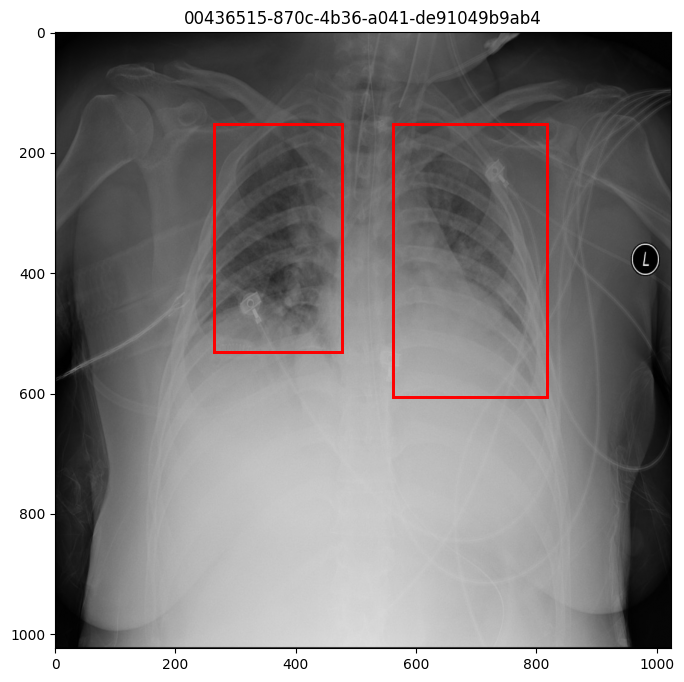

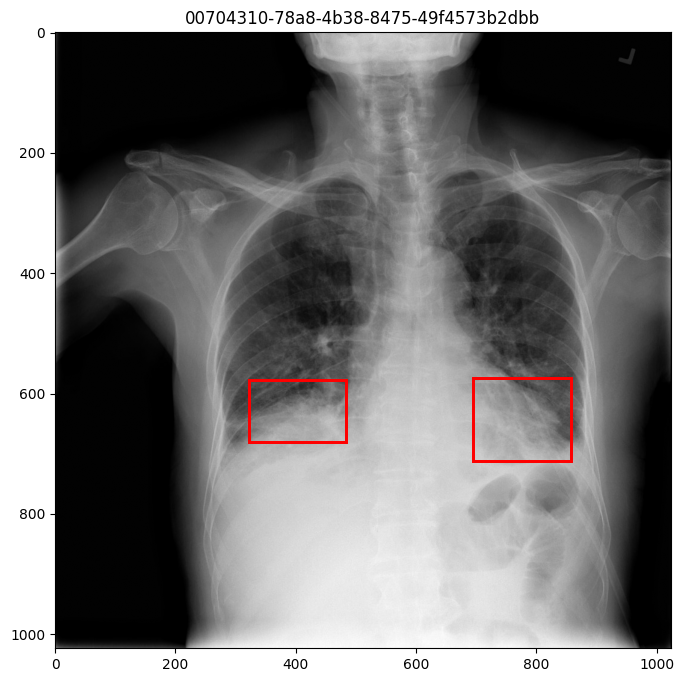

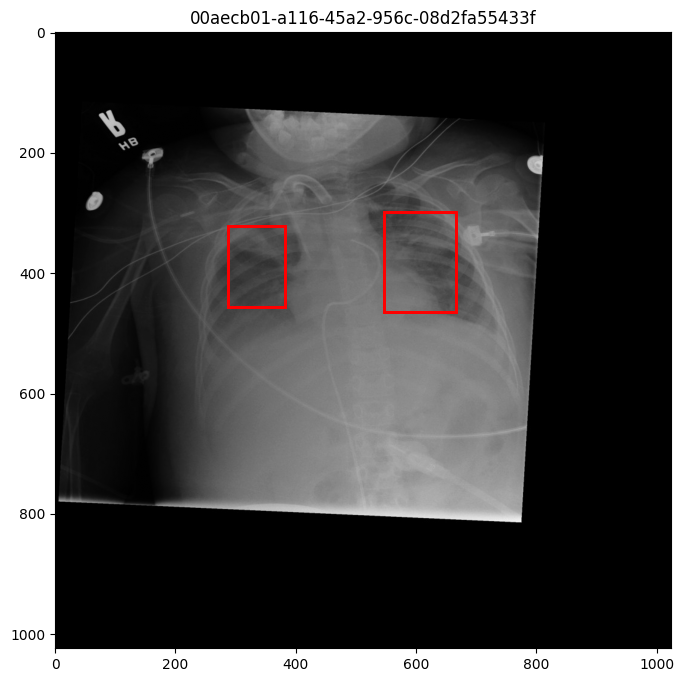

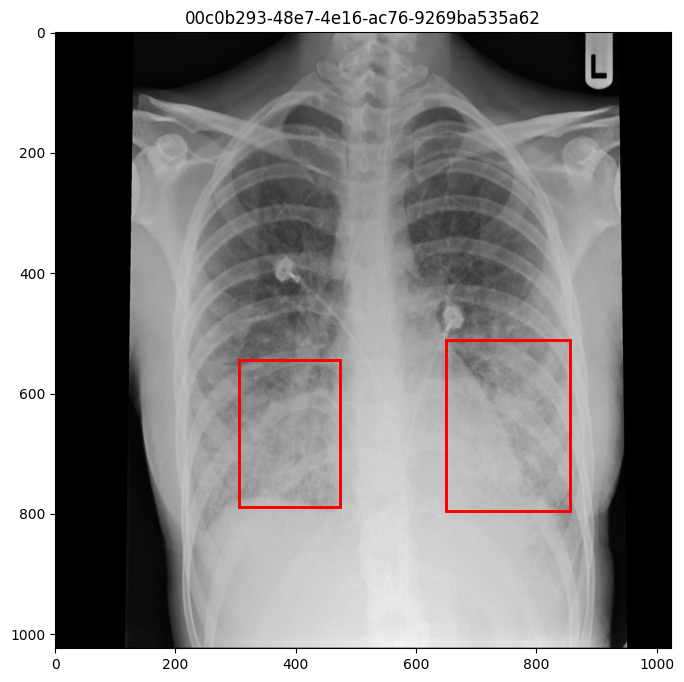

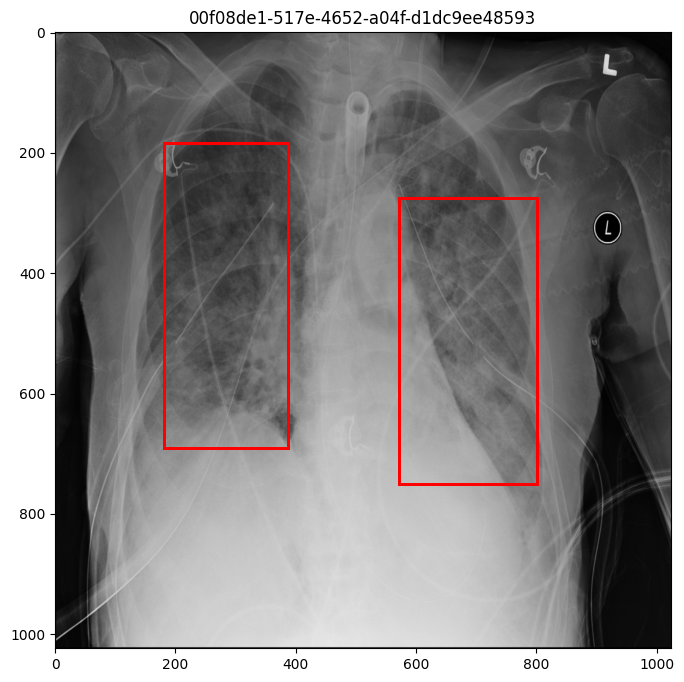

In [21]:
pneumonia_patients = df[df['Target']==1]['patientId'].unique()
# Display 5 images with bounding boxes for pneumonia patients
for patient_id in pneumonia_patients[:5]:
    show_dicom_image(patient_id, bbox=True)

In [22]:
!pip install -q pydicom tensorflow-addons

ERROR: Could not find a version that satisfies the requirement tensorflow-addons (from versions: none)
ERROR: No matching distribution found for tensorflow-addons


# Task
Design, test, and train basic CNN models using the DICOM images.

## Prepare data for cnn

### Subtask:
Resize and normalize the DICOM images to a suitable format for CNN input.


**Reasoning**:
Initialize lists to store processed images and labels and then iterate through the DICOM files, read, resize, and normalize the images, and append them along with their labels to the lists. Finally, convert the lists to NumPy arrays.



## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the processed image data and labels into training and testing sets and print their shapes.



## Design cnn model

### Subtask:
Define the architecture of a basic CNN model for image classification.


**Reasoning**:
Define the architecture of a basic CNN model using sequential API with convolutional, pooling, flatten, and dense layers.



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape based on the processed image size
IMG_SIZE = 128 # Define IMG_SIZE here
input_shape = (IMG_SIZE, IMG_SIZE, 1) # Assuming grayscale images, add a channel dimension

# Initialize the sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

## Compile cnn model

### Subtask:
Compile the CNN model with an appropriate optimizer, loss function, and metrics.


**Reasoning**:
Compile the defined CNN model for binary classification with an appropriate optimizer, loss function, and metrics.



In [24]:
# Compile the model
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])  # Evaluate using accuracy

# The model is now compiled and ready for training
print("Model compiled successfully.")

Model compiled successfully.


## Train cnn model

### Subtask:
Train the compiled CNN model using the training data.


**Reasoning**:
Train the compiled CNN model using the training data, specifying the number of epochs and a validation split, and store the training history.



# Task
Convert DICOM images to JPEG format for faster processing, then design, train, and test a basic CNN model using the converted JPEG images.

## Convert dicom to jpeg

### Subtask:
Create a new directory to store the converted JPEG images and write a script to read the DICOM files and save their pixel data as JPEG files in the new directory.


**Reasoning**:
Create a new directory for JPEG images and iterate through the DICOM files to read, convert to JPEG, and save them in the new directory.



In [25]:
!pip install pydicom

In [26]:
import concurrent.futures
import threading # Import threading for ThreadPoolExecutor
import time # Import time to potentially add delays for clearer logging if needed

# Define target image size (should be the same as before)
IMG_SIZE = 128

# Define the directory containing the JPEG images
jpeg_image_dir_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/jpeg_images'

# Get the list of JPEG files in the directory
jpeg_files = [f for f in os.listdir(jpeg_image_dir_path) if f.lower().endswith('.jpeg')]

# Create a dictionary mapping patientId to Target for quick lookup (reusing the one created from the original df)
# Ensure 'df' is available in the environment, if not, reload it or make sure it's not cleared
if 'df' not in locals():
    print("DataFrame 'df' not found. Please ensure the DataFrame with labels is loaded.")
    # You might need to reload df here if it's not guaranteed to be present
    # For example: df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_train_labels.csv")
    # class_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/stage_2_detailed_class_info.csv")
    # df = pd.merge(labels, class_info, on="patientId", how="left")


patient_id_to_target = df.set_index('patientId')['Target'].to_dict()

# Initialize lists to store processed images and labels (these will be populated by threads)
processed_images_jpeg = []
image_labels_jpeg = []

# Use a lock for thread-safe appending to the lists
list_lock = threading.Lock()

def process_image_file(jpeg_file):
    """Processes a single JPEG image file."""
    # Extract patientId from the filename (remove .jpeg extension)
    patient_id = os.path.splitext(jpeg_file)[0]

    # Construct the full path to the JPEG file
    jpeg_path = os.path.join(jpeg_image_dir_path, jpeg_file)

    try:
        # Read the JPEG image (cv2.imread reads in BGR format by default)
        image_array = cv2.imread(jpeg_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale

        # Check if image reading was successful
        if image_array is None:
            # print(f"Error reading JPEG file: {jpeg_file}") # Avoid excessive printing in threads
            return None, None # Return None for both image and label

        # Resize the image
        resized_image = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))

        # Normalize the pixel values to a range between 0 and 1
        # Ensure we handle potential division by zero if an image is completely black
        max_pixel_value = np.max(resized_image)
        if max_pixel_value > 0:
            normalized_image = resized_image.astype(np.float32) / max_pixel_value
        else:
            normalized_image = resized_image.astype(np.float32) # Image is black, normalization not needed

        # Get the corresponding label (0 or 1)
        # Use .get() with a default value (e.g., 0) for patientIds not in the labels df
        label = patient_id_to_target.get(patient_id, 0)

        return normalized_image, label

    except Exception as e:
        print(f"Error processing JPEG file {jpeg_file}: {e}")
        return None, None # Return None for both image and label


# Use ThreadPoolExecutor for parallel processing
# Choose a suitable number of worker threads (e.g., based on the number of CPU cores or a fixed number)
num_worker_threads = os.cpu_count() * 2 if os.cpu_count() else 4 # Example: 2x CPU count or 4
print(f"Using {num_worker_threads} worker threads for image processing.")

processed_count = 0
total_files = len(jpeg_files)
print_progress_interval = 100 # Print progress every 100 files

with concurrent.futures.ThreadPoolExecutor(max_workers=num_worker_threads) as executor:
    # Submit the processing task for each JPEG file
    future_to_file = {executor.submit(process_image_file, jpeg_file): jpeg_file for jpeg_file in jpeg_files}

    # Collect the results as they complete
    for future in concurrent.futures.as_completed(future_to_file):
        jpeg_file = future_to_file[future]
        try:
            image, label = future.result()
            if image is not None and label is not None:
                 with list_lock: # Use the lock when appending to shared lists
                    processed_images_jpeg.append(image)
                    image_labels_jpeg.append(label)

            # Increment processed count and print progress
            with list_lock: # Use the same lock for updating the counter
                processed_count += 1
                if processed_count % print_progress_interval == 0 or processed_count == total_files:
                    print(f"Processed {processed_count}/{total_files} images ({processed_count/total_files:.1%})")

        except Exception as exc:
            print(f'{jpeg_file} generated an exception: {exc}')

# Convert the lists to NumPy arrays
processed_images_jpeg = np.array(processed_images_jpeg)
image_labels_jpeg = np.array(image_labels_jpeg)


print(f"\nFinished processing. Processed {len(processed_images_jpeg)} JPEG images.")
print(f"Shape of processed images array: {processed_images_jpeg.shape}")
print(f"Shape of image labels array: {image_labels_jpeg.shape}")

Using 16 worker threads for image processing.
Processed 100/19500 images (0.5%)
Processed 200/19500 images (1.0%)
Processed 300/19500 images (1.5%)
Processed 400/19500 images (2.1%)
Processed 500/19500 images (2.6%)
Processed 600/19500 images (3.1%)
Processed 700/19500 images (3.6%)
Processed 800/19500 images (4.1%)
Processed 900/19500 images (4.6%)
Processed 1000/19500 images (5.1%)
Processed 1100/19500 images (5.6%)
Processed 1200/19500 images (6.2%)
Processed 1300/19500 images (6.7%)
Processed 1400/19500 images (7.2%)
Processed 1500/19500 images (7.7%)
Processed 1600/19500 images (8.2%)
Processed 1700/19500 images (8.7%)
Processed 1800/19500 images (9.2%)
Processed 1900/19500 images (9.7%)
Processed 2000/19500 images (10.3%)
Processed 2100/19500 images (10.8%)
Processed 2200/19500 images (11.3%)
Processed 2300/19500 images (11.8%)
Processed 2400/19500 images (12.3%)
Processed 2500/19500 images (12.8%)
Processed 2600/19500 images (13.3%)
Processed 2700/19500 images (13.8%)
Processed 

In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_jpeg, X_test_jpeg, y_train_jpeg, y_test_jpeg = train_test_split(
    processed_images_jpeg,
    image_labels_jpeg,
    test_size=0.2,  # 20% for testing
    random_state=42  # for reproducibility
)

# Print the shapes of the resulting sets
print(f"Shape of X_train_jpeg: {X_train_jpeg.shape}")
print(f"Shape of X_test_jpeg: {X_test_jpeg.shape}")
print(f"Shape of y_train_jpeg: {y_train_jpeg.shape}")
print(f"Shape of y_test_jpeg: {y_test_jpeg.shape}")

Shape of X_train_jpeg: (15600, 128, 128)
Shape of X_test_jpeg: (3900, 128, 128)
Shape of y_train_jpeg: (15600,)
Shape of y_test_jpeg: (3900,)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape based on the processed image size (assuming grayscale)
input_shape = (IMG_SIZE, IMG_SIZE, 1)

# Initialize the sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])  # Evaluate using accuracy

# The model is now compiled and ready for training
print("Model compiled successfully.")

Model compiled successfully.


In [30]:
# Train the model
history = model.fit(
    X_train_jpeg,
    y_train_jpeg,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_split=0.2  # Use 20% of the training data for validation
)

print("Model training finished.")

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8011 - loss: 0.4490 - val_accuracy: 0.7962 - val_loss: 0.4389
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8087 - loss: 0.4173 - val_accuracy: 0.8064 - val_loss: 0.4196
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8161 - loss: 0.4035 - val_accuracy: 0.8087 - val_loss: 0.4128
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8313 - loss: 0.3771 - val_accuracy: 0.8144 - val_loss: 0.4028
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8311 - loss: 0.3786 - val_accuracy: 0.8170 - val_loss: 0.4107
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8440 - loss: 0.3481 - val_accuracy: 0.8144 - val_loss: 0.4129
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8616 - loss: 0.3339 - val_accuracy: 0.8122 - val_loss: 0.4329
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8740 - loss: 0.2891 - val_acc

In [31]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6254
Test Accuracy: 0.7882


In [32]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6254
Test Accuracy: 0.7882


# Task
Design, train, and test basic CNN models, fine-tune them, apply transfer learning, and design, train, and test R-CNN and its hybrids for object detection using the JPEG images in the "JPEG" folder. Pickle the final model and generate a final report.

## Fine tune the trained basic cnn models for classification

### Subtask:
Improve the performance of the basic CNN model by adjusting hyperparameters or using other fine-tuning techniques.


**Reasoning**:
Evaluate the currently trained model to establish a baseline and then start iterating on hyperparameter tuning by adding dropout layers and training with a different number of epochs and batch size.



In [33]:
# Evaluate the initial model
loss, accuracy = model.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
print(f"Baseline Test Loss: {loss:.4f}")
print(f"Baseline Test Accuracy: {accuracy:.4f}")

# --- Hyperparameter Tuning Experiment 1: Add Dropout and change epochs/batch size ---

# Define the input shape based on the processed image size (assuming grayscale)
input_shape = (IMG_SIZE, IMG_SIZE, 1)

# Initialize the sequential model
model_tuned1 = Sequential()

# Add Convolutional layers
model_tuned1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_tuned1.add(MaxPooling2D(pool_size=(2, 2)))

model_tuned1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_tuned1.add(MaxPooling2D(pool_size=(2, 2)))

model_tuned1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_tuned1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model_tuned1.add(Flatten())

# Add Dense layers with Dropout
model_tuned1.add(Dense(128, activation='relu'))
model_tuned1.add(Dropout(0.5)) # Add dropout layer
model_tuned1.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model_tuned1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

print("\nModel tuned 1 compiled. Summary:")
model_tuned1.summary()

# Train the tuned model
print("\nTraining Tuned Model 1...")
history_tuned1 = model_tuned1.fit(
    X_train_jpeg,
    y_train_jpeg,
    epochs=15,  # Increased epochs
    batch_size=64, # Increased batch size
    validation_split=0.2  # Use 20% of the training data for validation
)

# Evaluate the tuned model
loss_tuned1, accuracy_tuned1 = model_tuned1.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
print(f"\nTuned Model 1 Test Loss: {loss_tuned1:.4f}")
print(f"Tuned Model 1 Test Accuracy: {accuracy_tuned1:.4f}")

Baseline Test Loss: 0.6254
Baseline Test Accuracy: 0.7882

Model tuned 1 compiled. Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)


Training Tuned Model 1...
Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7923 - loss: 0.4714 - val_accuracy: 0.8048 - val_loss: 0.4182
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8142 - loss: 0.4085 - val_accuracy: 0.8026 - val_loss: 0.4169
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8172 - loss: 0.4098 - val_accuracy: 0.8077 - val_loss: 0.4253
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8207 - loss: 0.4027 - val_accuracy: 0.8112 - val_loss: 0.4158
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8282 - loss: 0.3919 - val_accuracy: 0.8099 - val_loss: 0.4086
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8278 - loss: 0.3775 - val_accuracy: 0.8128 - val_loss: 0.4031
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8268 - loss: 0.3768 - val_accuracy: 0.8131 - val_loss: 0.4028
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.84

In [34]:
# Evaluate the tuned model
loss_tuned1, accuracy_tuned1 = model_tuned1.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
print(f"\nTuned Model 1 Test Loss: {loss_tuned1:.4f}")
print(f"Tuned Model 1 Test Accuracy: {accuracy_tuned1:.4f}")


Tuned Model 1 Test Loss: 0.5666
Tuned Model 1 Test Accuracy: 0.8056


In [35]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet data, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)) # VGG16 expects 3 channels

# Freeze the layers of the base model so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # Output layer for binary classification

# Create the new model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

print("Transfer Learning Model (VGG16) compiled. Summary:")
model_transfer.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Transfer Learning Model (VGG16) compiled. Summary:


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [36]:
# Repeat the grayscale channel 3 times to match VGG16 input shape (IMG_SIZE, IMG_SIZE, 3)
X_train_jpeg_rgb = np.repeat(X_train_jpeg[..., np.newaxis], 3, axis=-1)
X_test_jpeg_rgb = np.repeat(X_test_jpeg[..., np.newaxis], 3, axis=-1)


print(f"Shape of X_train_jpeg_rgb: {X_train_jpeg_rgb.shape}")
print(f"Shape of X_test_jpeg_rgb: {X_test_jpeg_rgb.shape}")

# Train the transfer learning model
history_transfer = model_transfer.fit(
    X_train_jpeg_rgb,
    y_train_jpeg,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_split=0.2  # Use 20% of the training data for validation
)

print("Transfer Learning Model training finished.")

Shape of X_train_jpeg_rgb: (15600, 128, 128, 3)
Shape of X_test_jpeg_rgb: (3900, 128, 128, 3)
Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.7984 - loss: 0.4683 - val_accuracy: 0.8240 - val_loss: 0.3823
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8303 - loss: 0.3856 - val_accuracy: 0.8330 - val_loss: 0.3788
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8328 - loss: 0.3695 - val_accuracy: 0.8324 - val_loss: 0.3764
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8454 - loss: 0.3479 - val_accuracy: 0.8330 - val_loss: 0.3712
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8439 - loss: 0.3466 - val_accuracy: 0.8282 - val_loss: 0.3827
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8537 - loss: 0.3320 - val_accuracy: 0.8272 - val_loss: 0.3804
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8584 - loss: 0.3216 - val_accuracy: 0.8186 - val_loss: 0.3

In [37]:
## Evaluate the transfer model
#loss_transfer, accuracy_transfer = model_transfer.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
#print(f"\nTransfer Model Test Loss: {loss_transfer:.4f}")
#print(f"Transfer Model Test Accuracy: {accuracy_transfer:.4f}")

# Task
Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.

## Prepare data for r-cnn

### Subtask:
Preprocess the image data and bounding box annotations into a format suitable for training an R-CNN model. This will involve creating region proposals and associating them with ground truth bounding boxes.


**Reasoning**:
Implement a function to generate region proposals using Selective Search and associate them with ground truth bounding boxes based on IoU.



In [38]:
import cv2 # Import cv2
import numpy as np # Import numpy
import os # Import os

# Define the directory containing the JPEG images
jpeg_image_dir_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/jpeg_images' # Added definition

def get_iou(boxA, boxB):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.
    """
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

def generate_dummy_proposals(image_shape, num_proposals=10):
    """
    Generates dummy region proposals for demonstration.
    In a real scenario, this would be Selective Search or another method.
    """
    proposals = []
    h, w = image_shape[:2]
    for _ in range(num_proposals):
        x = np.random.randint(0, w - 50)
        y = np.random.randint(0, h - 50)
        width = np.random.randint(50, w - x)
        height = np.random.randint(50, h - y)
        proposals.append([x, y, width, height])
    return proposals


def preprocess_for_rcnn_dummy(df, jpeg_image_dir_path, iou_threshold=0.5, num_proposals_per_image=10):
    """
    Preprocesses images and annotations for R-CNN training using dummy proposals.

    Args:
        df: DataFrame containing annotations (patientId, x, y, width, height, Target).
        jpeg_image_dir_path: Path to the directory containing JPEG images.
        iou_threshold: IoU threshold for considering a proposal a positive match.
        num_proposals_per_image: Number of dummy proposals to generate per image.


    Returns:
        A list of dictionaries, where each dictionary contains:
            'image_path': Path to the image.
            'proposals': List of region proposals (x, y, width, height).
            'labels': List of labels for each proposal (1 for pneumonia, 0 for background).
            'gt_boxes': List of ground truth bounding boxes (x, y, width, height).
    """
    processed_data = []
    # Filter for images with pneumonia to get ground truth boxes
    pneumonia_df = df[df['Target'] == 1].copy()

    # Group ground truth boxes by patientId
    gt_boxes_by_patient = pneumonia_df.groupby('patientId')[['x', 'y', 'width', 'height']].apply(lambda x: x.values.tolist()).to_dict()


    image_files = [f for f in os.listdir(jpeg_image_dir_path) if f.lower().endswith('.jpeg')]

    for image_file in image_files:
        patient_id = os.path.splitext(image_file)[0]
        image_path = os.path.join(jpeg_image_dir_path, image_file)

        # Load the image to get its shape for dummy proposal generation
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read image {image_file}. Skipping.")
            continue

        # Generate dummy region proposals
        proposals = generate_dummy_proposals(img.shape, num_proposals=num_proposals_per_image)

        # Get ground truth boxes for this patient
        gt_boxes = gt_boxes_by_patient.get(patient_id, [])

        proposal_labels = []

        for proposal in proposals:
            is_pneumonia = 0  # Default to background
            if gt_boxes: # Only check for overlap if there are ground truth boxes
                for gt_box in gt_boxes:
                    if get_iou(proposal, gt_box) >= iou_threshold:
                        is_pneumonia = 1 # Mark as pneumonia if IoU is above threshold
                        break # No need to check other ground truth boxes for this proposal
            proposal_labels.append(is_pneumonia)

        processed_data.append({
            'image_path': image_path,
            'proposals': proposals,
            'labels': proposal_labels,
            'gt_boxes': gt_boxes # Include ground truth boxes for potential regression task later
        })

    return processed_data

# Example usage (assuming 'df' and 'jpeg_image_dir_path' are defined from previous steps)
# Check if 'df' exists before calling the function
if 'df' in locals():
    processed_rcnn_data = preprocess_for_rcnn_dummy(df, jpeg_image_dir_path, num_proposals_per_image=20) # Generate more dummy proposals
    print(f"Processed data for R-CNN for {len(processed_rcnn_data)} images.")
else:
    print("DataFrame 'df' not found. Cannot proceed with R-CNN preprocessing.")

Processed data for R-CNN for 19500 images.


## Define the r-cnn model

### Subtask:
Design the architecture of the R-CNN model, potentially using a pre-trained CNN as the backbone for feature extraction.


**Reasoning**:
Define the R-CNN model architecture using VGG16 as the backbone, add classification and bounding box regression layers, instantiate the model, and print the summary.



In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the input shape for the R-CNN model
# The input will be individual region proposals, which will be resized
# Let's assume we will resize proposals to a fixed size, e.g., 224x224 (suitable for VGG16)
PROPOSAL_IMG_SIZE = 224
input_shape_rcnn = (PROPOSAL_IMG_SIZE, PROPOSAL_IMG_SIZE, 3) # VGG16 expects 3 channels

# Load the VGG16 model pre-trained on ImageNet data, excluding the top classification layer
# We will use the 'functional' API to build the R-CNN model on top of this
base_model_rcnn = VGG16(weights='imagenet', include_top=False, input_shape=input_shape_rcnn)

# Freeze the layers of the base model
for layer in base_model_rcnn.layers:
    layer.trainable = False

# Add custom layers on top of the base model for R-CNN
# The output of the base model is the feature map from the last convolutional block
x = base_model_rcnn.output

# Flatten the feature map
x = Flatten()(x)

# Add Dense layers for classification (binary: pneumonia/background) and bounding box regression
# Classification head
classification_head = Dense(128, activation='relu')(x)
classification_output = Dense(1, activation='sigmoid', name='classification_output')(classification_head) # Binary classification

# Bounding box regression head
# The output shape should be 4 (for x, y, width, height)
regression_head = Dense(128, activation='relu')(x)
regression_output = Dense(4, activation='linear', name='regression_output')(regression_head) # Linear activation for regression

# Create the R-CNN model with two outputs
model_rcnn = Model(inputs=base_model_rcnn.input, outputs=[classification_output, regression_output])

# Compile the model
# We need to compile with two loss functions, one for each output
# Binary crossentropy for classification, and Mean Squared Error (MSE) for regression
# We can assign weights to each loss if needed
model_rcnn.compile(optimizer=Adam(learning_rate=0.0001),
                   loss={'classification_output': 'binary_crossentropy', 'regression_output': 'mse'},
                   metrics={'classification_output': 'accuracy', 'regression_output': 'mse'})


print("R-CNN Model compiled. Summary:")
model_rcnn.summary()

R-CNN Model compiled. Summary:


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer_4[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 14, 14,    │  2,359,808 │ block5_conv1[0][

 Total params: 21,138,117 (80.64 MB)

 Trainable params: 6,423,429 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Reasoning**:
The R-CNN model architecture has been defined. The next step is to prepare the data by extracting features from the region proposals using the pre-trained CNN backbone and associate these features with their corresponding classification labels and regression targets.



In [47]:
import cv2
import numpy as np
import os
import time
import logging
import random
import tensorflow as tf

# --- TensorFlow/Keras Imports ---
try:
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Flatten, Dense, Input, Lambda, TimeDistributed
    from tensorflow.keras.applications import VGG16
    from tensorflow.keras.optimizers import Adam
    import keras # Import keras to use the serializable decorator
except ImportError:
    print("Error: TensorFlow/Keras not found. This script requires TensorFlow.")
    exit()

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the directory containing the JPEG images (LOCAL Windows path)
jpeg_image_dir_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/jpeg_images'

# -------------------------------------------------------------------
#  HELPER FUNCTIONS (Unchanged)
# -------------------------------------------------------------------

def get_iou(boxA, boxB):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.
    """
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
    denominator = float(boxAArea + boxBArea - interArea)
    if denominator == 0:
        return 0.0
    iou = interArea / denominator
    return iou

def generate_dummy_proposals(image_shape, num_proposals=10):
    """
    Generates dummy region proposals for demonstration.
    """
    proposals = []
    h, w = image_shape[:2]
    for _ in range(num_proposals):
        x = np.random.randint(0, w - 50 if w > 50 else 0)
        y = np.random.randint(0, h - 50 if h > 50 else 0)
        width = np.random.randint(50, w - x if w - x > 50 else 51)
        height = np.random.randint(50, h - y if h - y > 50 else 51)
        proposals.append([x, y, width, height])
    return proposals

def convert_boxes_to_yxyx(boxes_xywh):
    """Converts [x, y, w, h] to [y1, x1, y2, x2]"""
    boxes_yxyx = np.zeros_like(boxes_xywh, dtype=np.float32)
    boxes_yxyx[:, 0] = boxes_xywh[:, 1]
    boxes_yxyx[:, 1] = boxes_xywh[:, 0]
    boxes_yxyx[:, 2] = boxes_xywh[:, 1] + boxes_xywh[:, 3]
    boxes_yxyx[:, 3] = boxes_xywh[:, 0] + boxes_xywh[:, 2]
    return boxes_yxyx

def normalize_boxes(boxes_yxyx, image_shape):
    """Normalizes [y1, x1, y2, x2] coordinates to [0, 1]"""
    h, w = image_shape[:2]
    h_f = float(h) if h > 0 else 1.0
    w_f = float(w) if w > 0 else 1.0
    normalized_boxes = np.zeros_like(boxes_yxyx, dtype=np.float32)
    normalized_boxes[:, 0] = boxes_yxyx[:, 0] / h_f
    normalized_boxes[:, 1] = boxes_yxyx[:, 1] / w_f
    normalized_boxes[:, 2] = boxes_yxyx[:, 2] / h_f
    normalized_boxes[:, 3] = boxes_yxyx[:, 3] / w_f
    return normalized_boxes


def fast_rcnn_data_generator(data_list, num_proposals):
    """
    Generator that yields data for Fast R-CNN training.
    Processes one image and its proposals at a time.
    """
    for item in data_list:
        image_path = item['image_path']
        proposals = item['proposals']
        labels = item['labels']
        gt_boxes = item['gt_boxes'] # Not used for training Fast R-CNN directly, but good to keep

        # Load and preprocess the image
        img = cv2.imread(image_path)
        if img is None or img.size == 0:
            logging.warning(f"Could not read image {image_path}. Skipping.")
            continue
        # Convert grayscale to RGB if needed
        if len(img.shape) == 2 or img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

        # Normalize image pixels
        img_norm = img.astype(np.float32) / 255.0

        # Resize image to a fixed size for the base model input (e.g., VGG16 expects 224x224)
        # This is a simplification; in a real R-CNN, you'd resize proposals, not the whole image
        # However, for this model structure, the base model expects a fixed input size.
        # Let's resize to 224x224 as defined by PROPOSAL_IMG_SIZE earlier if it exists
        fixed_img_size = globals().get('PROPOSAL_IMG_SIZE', 224) # Use 224 as default
        if img_norm.shape[0] != fixed_img_size or img_norm.shape[1] != fixed_img_size:
             img_norm = cv2.resize(img_norm, (fixed_img_size, fixed_img_size))


        proposal_reg_targets = []

        # Ensure the number of proposals matches num_proposals by padding or truncating
        current_num_proposals = len(proposals)
        if current_num_proposals < num_proposals:
            padding_needed = num_proposals - current_num_proposals
            # Pad with dummy proposals (e.g., [0,0,1,1] with background label)
            dummy_proposals = [[0, 0, 1, 1]] * padding_needed
            dummy_labels = [0] * padding_needed
            dummy_reg_targets = [[0, 0, 0, 0]] * padding_needed
            proposals.extend(dummy_proposals)
            labels.extend(dummy_labels)

            # Recalculate regression targets for consistency within the generator
            for i, proposal in enumerate(proposals):
                 reg_target = [0, 0, 0, 0]
                 # Find the best ground truth box for this proposal
                 best_iou = 0
                 best_gt_box = None
                 if gt_boxes:
                     for gt_box in gt_boxes:
                         iou = get_iou(proposal, gt_box)
                         if iou > best_iou:
                             best_iou = iou
                             best_gt_box = gt_box

                 # Only calculate regression target if it's a positive proposal (label 1)
                 # and there is a corresponding best ground truth box
                 if labels[i] == 1 and best_gt_box:
                     px, py, pw, ph = proposal
                     gx, gy, gw, gh = best_gt_box
                     # Avoid division by zero
                     pw_safe = pw if pw > 1e-8 else 1e-8
                     ph_safe = ph if ph > 1e-8 else 1e-8
                     gw_safe = gw if gw > 1e-8 else 1e-8
                     gh_safe = gh if gh > 1e-8 else 1e-8

                     tx = (gx - px) / pw_safe
                     ty = (gy - py) / ph_safe
                     tw = np.log(gw_safe / pw_safe)
                     th = np.log(gh_safe / ph_safe)
                     reg_target = [tx, ty, tw, th]
                 proposal_reg_targets.append(reg_target)


        elif current_num_proposals > num_proposals:
            # Truncate proposals, labels, and regression targets
            proposals = proposals[:num_proposals]
            labels = labels[:num_proposals]
            # Need to ensure regression targets also truncated
            # Assuming proposal_reg_targets is generated based on the proposals list
            # Let's regenerate targets for truncated proposals for safety
            for i, proposal in enumerate(proposals):
                 reg_target = [0, 0, 0, 0]
                 best_iou = 0
                 best_gt_box = None
                 if gt_boxes:
                     for gt_box in gt_boxes:
                         iou = get_iou(proposal, gt_box)
                         if iou > best_iou:
                             best_iou = iou
                             best_gt_box = gt_box
                 if labels[i] == 1 and best_gt_box:
                     px, py, pw, ph = proposal
                     gx, gy, gw, gh = best_gt_box
                     pw_safe = pw if pw > 1e-8 else 1e-8
                     ph_safe = ph if ph > 1e-8 else 1e-8
                     gw_safe = gw if gw > 1e-8 else 1e-8
                     gh_safe = gh if gh > 1e-8 else 1e-8
                     tx = (gx - px) / pw_safe
                     ty = (gy - py) / ph_safe
                     tw = np.log(gw_safe / pw_safe)
                     th = np.log(gh_safe / ph_safe)
                     reg_target = [tx, ty, tw, th]
                 proposal_reg_targets.append(reg_target)
            # End of target recalculation for truncated proposals

        else: # current_num_proposals == num_proposals
             # Recalculate regression targets for consistency within the generator
            for i, proposal in enumerate(proposals):
                 reg_target = [0, 0, 0, 0]
                 # Find the best ground truth box for this proposal
                 best_iou = 0
                 best_gt_box = None
                 if gt_boxes:
                     for gt_box in gt_boxes:
                         iou = get_iou(proposal, gt_box)
                         if iou > best_iou:
                             best_iou = iou
                             best_gt_box = gt_box

                 # Only calculate regression target if it's a positive proposal (label 1)
                 # and there is a corresponding best ground truth box
                 if labels[i] == 1 and best_gt_box:
                     px, py, pw, ph = proposal
                     gx, gy, gw, gh = best_gt_box
                     # Avoid division by zero
                     pw_safe = pw if pw > 1e-8 else 1e-8
                     ph_safe = ph if ph > 1e-8 else 1e-8
                     gw_safe = gw if gw > 1e-8 else 1e-8
                     gh_safe = gh if gh > 1e-8 else 1e-8

                     tx = (gx - px) / pw_safe
                     ty = (gy - py) / ph_safe
                     tw = np.log(gw_safe / pw_safe)
                     th = np.log(gh_safe / ph_safe)
                     reg_target = [tx, ty, tw, th]
                 proposal_reg_targets.append(reg_target)

        # Convert proposals to yxyx format and normalize
        proposals_xywh = np.array(proposals)
        proposals_yxyx = convert_boxes_to_yxyx(proposals_xywh)
        # Normalizing ROIs relative to the resized image dimensions
        proposals_norm = normalize_boxes(proposals_yxyx, img_norm.shape) # Use img_norm.shape

        # Prepare labels and regression targets
        labels_np = np.array(labels, dtype=int)
        labels_one_hot = np.eye(NUM_CLASSES)[labels_np] # Use NUM_CLASSES
        targets_np = np.array(proposal_reg_targets, dtype=np.float32)

        # Add batch dimension of 1 to match model input shape
        img_norm = np.expand_dims(img_norm, axis=0)
        proposals_norm = np.expand_dims(proposals_norm, axis=0)
        labels_one_hot = np.expand_dims(labels_one_hot, axis=0)
        targets_np = np.expand_dims(targets_np, axis=0)

        yield {'image_input': img_norm, 'rois_input': proposals_norm}, (labels_one_hot, targets_np)


# -------------------------------------------------------------------
#  MODIFIED: CREATE TF.DATA.DATASET (Memory-Efficient and Repeatable)
# -------------------------------------------------------------------

def create_rcnn_dataset_efficient(data_list, num_proposals_per_image, batch_size=1):
    """
    Creates a tf.data.Dataset from a list of processed data,
    using the fast_rcnn_data_generator.
    """
    # Define output types and shapes as expected by the generator
    output_types = (
        {'image_input': tf.float32, 'rois_input': tf.float32},
        (tf.float32, tf.float32)
    )
    output_shapes = (
        {'image_input': tf.TensorShape([batch_size, None, None, 3]), # Batch dim for image
         'rois_input': tf.TensorShape([batch_size, num_proposals_per_image, 4])}, # Batch dim for ROIs
        (tf.TensorShape([batch_size, num_proposals_per_image, NUM_CLASSES]), # Batch dim for labels
         tf.TensorShape([batch_size, num_proposals_per_image, 4])) # Batch dim for targets
    )


    dataset = tf.data.Dataset.from_generator(
        lambda: fast_rcnn_data_generator(data_list, num_proposals_per_image),
        output_types=output_types,
        output_shapes=output_shapes
    )

    # *** KEY ADDITION: .repeat() to prevent the dataset from running out of data ***
    dataset = dataset.repeat()

    # We are already batching inside the generator with batch_size=1
    # If you want larger batches, adjust batch_size in the generator
    # dataset = dataset.batch(batch_size) # Removed this batching step
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset, len(data_list)



# -------------------------------------------------------------------
#  MODIFIED: Fast R-CNN MODEL (REPLACED)
# -------------------------------------------------------------------

def create_fast_rcnn_model(base_model, num_proposals, pool_size=7, num_classes=2):
    """
    Creates the Fast R-CNN model.
    """

    image_input = Input(shape=(None, None, 3), name="image_input")
    rois_input = Input(shape=(num_proposals, 4), name="rois_input")

    vgg_base = Model(inputs=base_model.input, outputs=base_model.output)
    feature_map = vgg_base(image_input)

    # Use Lambda layer with a custom function for ROI pooling
    @keras.saving.register_keras_serializable() # Register for serialization
    def roi_pooling_layer_fn(inputs):
        feature_map_batch, rois_batch = inputs
        # Ensure rois_batch has a batch dimension (which it should from the generator)
        # if tf.rank(rois_batch) == 2:
        #     rois_batch = tf.expand_dims(rois_batch, axis=0) # Add batch dim if missing (shouldn't be needed with generator fix)


        batch_size = tf.shape(feature_map_batch)[0]
        num_proposals_in_batch = tf.shape(rois_batch)[1] # Get num_proposals from the batch


        # Flatten proposals to (B * num_rois, 4)
        rois_flat = tf.reshape(rois_batch, [batch_size * num_proposals_in_batch, 4])

        # Create box_indices: batch indices for each ROI
        box_indices = tf.repeat(tf.range(batch_size), num_proposals_in_batch)


        # Apply crop_and_resize to extract fixed-size features for each ROI
        pooled_rois = tf.image.crop_and_resize(
            image=feature_map_batch,
            boxes=rois_flat,
            box_indices=box_indices,
            crop_size=(pool_size, pool_size)  # must match what was used during training
        )

        # Reshape back to (B, num_rois, pool_size, pool_size, channels)
        channels = tf.shape(pooled_rois)[-1]
        pooled_rois_reshaped = tf.reshape(pooled_rois, [batch_size, num_proposals_in_batch, pool_size, pool_size, channels])
        return pooled_rois_reshaped

    # Calculate the output shape of the lambda layer dynamically based on input shapes
    @keras.saving.register_keras_serializable() # Register for serialization
    def roi_pooling_output_shape(input_shapes):
        feature_map_shape, rois_shape = input_shapes
        # The output shape will have the batch size from the feature map,
        # the number of ROIs from the rois_batch, the pool size, and the channels from the feature map.
        if feature_map_shape[0] is None or rois_shape[1] is None:
             return (None, None, pool_size, pool_size, feature_map_shape[-1])
        else:
             return (feature_map_shape[0], rois_shape[1], pool_size, pool_size, feature_map_shape[-1])


    pooled_rois_layer = Lambda(roi_pooling_layer_fn, output_shape=roi_pooling_output_shape, name="roi_pooling")([feature_map, rois_input])


    flattened_pooled = TimeDistributed(Flatten(name="flatten_pooled"))(pooled_rois_layer)

    cls_head = TimeDistributed(Dense(128, activation='relu', name='cls_dense_1'))(flattened_pooled)
    cls_output = TimeDistributed(Dense(num_classes, activation='softmax', name='cls_output'), name='cls_output')(cls_head)

    reg_head = TimeDistributed(Dense(128, activation='relu', name='reg_dense_1'))(flattened_pooled)
    reg_output = TimeDistributed(Dense(4, activation='linear', name='reg_output'), name='reg_output')(reg_head)

    model = Model(
        inputs=[image_input, rois_input],
        outputs=[cls_output, reg_output]
    )

    return model

# -------------------------------------------------------------------
#  MODIFIED: MAIN EXECUTION & TRAINING (Updated to use new function)
# -------------------------------------------------------------------

# We assume 'df' (your DataFrame of annotations) is already loaded
if 'df' in locals():
    # --- 1. Define Constants ---
    NUM_PROPOSALS_PER_IMAGE = 20
    POOL_SIZE = 7
    NUM_CLASSES = 2
    # MODIFIED: Limit the number of images for R-CNN training
    MAX_IMAGES_FOR_RCNN = 1000 # Changed from 2000 to 1000
    BATCH_SIZE = 1 # Batch size is handled by the generator yielding one image at a time


    # --- 2. Load Base Model ---
    logging.info("Loading base model (VGG16)...")
    base_model = VGG16(weights='imagenet',
                       include_top=False,
                       input_shape=(None, None, 3)) # Use None for height/width to allow variable input size

    # --- 3. Create the tf.data.Dataset directly ---
    logging.info("Creating tf.data.Dataset for R-CNN training...")

    # Assuming processed_rcnn_data is available from the previous step
    if 'processed_rcnn_data' not in locals() or not processed_rcnn_data:
         logging.error("processed_rcnn_data not found or is empty. Cannot create dataset.")
    else:
        # Limit the number of images used for R-CNN training
        limited_processed_rcnn_data = processed_rcnn_data[:MAX_IMAGES_FOR_RCNN]
        logging.info(f"Using {len(limited_processed_rcnn_data)} images for R-CNN training and validation.")

        # Split the processed data into training and validation sets
        train_data, val_data = train_test_split(
            limited_processed_rcnn_data,
            test_size=0.2,
            random_state=42
        )

        rcnn_dataset, total_train_images = create_rcnn_dataset_efficient(
            train_data,
            num_proposals_per_image=NUM_PROPOSALS_PER_IMAGE,
            batch_size=BATCH_SIZE # Pass batch size
        )

        val_rcnn_dataset, total_val_images = create_rcnn_dataset_efficient(
            val_data,
            num_proposals_per_image=NUM_PROPOSALS_PER_IMAGE,
            batch_size=BATCH_SIZE # Pass batch size
        )


        if total_train_images > 0 and total_val_images > 0:
            # Steps per epoch is the number of images
            steps_per_epoch = total_train_images
            validation_steps = total_val_images
            logging.info(f"Steps per epoch: {steps_per_epoch}, Validation steps: {validation_steps}")

            # --- 4. Create and Compile the Fast R-CNN Model ---
            logging.info("Creating Fast R-CNN model...")
            model = create_fast_rcnn_model(
                base_model,
                num_proposals=NUM_PROPOSALS_PER_IMAGE,
                pool_size=POOL_SIZE,
                num_classes=NUM_CLASSES
            )

            losses = {
                'cls_output': 'categorical_crossentropy',
                'reg_output': 'mean_squared_error'
            }
            loss_weights = {
                'cls_output': 1.0,
                'reg_output': 1.0
            }

            model.compile(
                optimizer=Adam(learning_rate=1e-5),
                loss=losses,
                loss_weights=loss_weights,
                metrics={'cls_output': 'accuracy'},
                jit_compile=False # Keep this False unless you are sure it helps and doesn't cause issues
            )

            model.summary()

            # --- 5. Train the Model using the tf.data.Dataset ---
            logging.info(f"Starting training with {steps_per_epoch} steps per epoch...")
            history = model.fit(
                rcnn_dataset,
                steps_per_epoch=steps_per_epoch,
                validation_data=val_rcnn_dataset,
                validation_steps=validation_steps,
                epochs=10 # Changed epochs from 10 to 10
            )
            logging.info("Training complete.")
        else:
            logging.error("Insufficient data processed for training and validation.")
else:
    print("DataFrame 'df' not found. Cannot proceed with R-CNN preprocessing.")

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_32       │ (None, None,      │ 14,714,688 │ image_input[0][0] │
│ (Functional)        │ None, 512)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rois_input          │ (None, 20, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roi_pooling         │ (None, None, 7,   │          0 │ functional_32[0]… │
│ (Lambda)            │ 7, 512)           │            │ rois_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_3  │ (None, None,      │          0 │ roi_pooling[0][0] │
│ (TimeDistributed)   │ 25088)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_4  │ (None, None, 128) │  3,211,392 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_5  │ (None, None, 128) │  3,211,392 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cls_output          │ (None, None, 2)   │        258 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reg_output          │ (None, None, 4)   │        516 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,138,246 (80.64 MB)

 Trainable params: 21,138,246 (80.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.6499 - loss: 0.6521 - reg_output_loss: 0.0022 - val_cls_output_accuracy: 0.9993 - val_cls_output_loss: 0.6058 - val_loss: 0.6063 - val_reg_output_loss: 4.9089e-04
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.5930 - loss: 0.5934 - reg_output_loss: 4.6560e-04 - val_cls_output_accuracy: 0.9993 - val_cls_output_loss: 0.5458 - val_loss: 0.5462 - val_reg_output_loss: 3.8856e-04
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.5316 - loss: 0.5318 - reg_output_loss: 2.5164e-04 - val_cls_output_accuracy: 0.9993 - val_cls_output_loss: 0.4814 - val_loss: 0.4816 - val_reg_output_loss: 2.0581e-04
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.4667 - loss: 0.4669 - reg_output_loss: 1.5623e-04 - val_cls_output_accuracy: 0.9993

**Reasoning**:
Train the R-CNN model using the extracted features and the corresponding classification labels and regression targets, specifying the number of epochs and batch size.

In [41]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import logging # Import logging

# Setup basic logging if not already configured
if not logging.getLogger().handlers:
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Check if 'processed_rcnn_data' is available
if 'processed_rcnn_data' not in locals() or not processed_rcnn_data:
    logging.error("processed_rcnn_data not found or is empty. Cannot proceed with R-CNN training.")
else:
    # --- Define Constants (ensure these are consistent with the model creation) ---
    NUM_PROPOSALS_PER_IMAGE = 20
    NUM_CLASSES = 2 # Assuming binary classification (pneumonia/background)
    # MODIFIED: Limit the number of images used for R-CNN training
    MAX_IMAGES_FOR_RCNN = 1000 # Changed from 2000 to 1000


    # 1. Limit the processed data list
    limited_processed_rcnn_data = processed_rcnn_data[:MAX_IMAGES_FOR_RCNN]
    logging.info(f"Using {len(limited_processed_rcnn_data)} images for R-CNN training and validation.")


    # 2. Split the processed data list (not arrays!)
    train_data, val_data = train_test_split(
        limited_processed_rcnn_data,
        test_size=0.2,
        random_state=42
    )

    # 3. Create generators for each split
    def create_train_generator():
        # Assumes fast_rcnn_data_generator is defined in a previous cell
        # Ensure fast_rcnn_data_generator is available in the environment
        if 'fast_rcnn_data_generator' in globals():
            return fast_rcnn_data_generator(train_data, NUM_PROPOSALS_PER_IMAGE)
        else:
            raise NameError("fast_rcnn_data_generator function not found.")


    def create_val_generator():
        # Assumes fast_rcnn_data_generator is defined in a previous cell
        # Ensure fast_rcnn_data_generator is available in the environment
        if 'fast_rcnn_data_generator' in globals():
            return fast_rcnn_data_generator(val_data, NUM_PROPOSALS_PER_IMAGE)
        else:
            raise NameError("fast_rcnn_data_generator function not found.")


    # -------------------------------------------------------------------
    #  4. CORRECTED Output Signature
    # -------------------------------------------------------------------
    # The generator yields a batch size of 1
    output_signature = (
        # --- Model Inputs (X) ---
        {'image_input': tf.TensorSpec(shape=(1, None, None, 3), dtype=tf.float32),      # (1, H, W, 3) Image
         'rois_input': tf.TensorSpec(shape=(1, NUM_PROPOSALS_PER_IMAGE, 4), dtype=tf.float32)}, # (1, N_proposals, 4) ROIs

        # --- Model Outputs (y) ---
        (tf.TensorSpec(shape=(1, NUM_PROPOSALS_PER_IMAGE, NUM_CLASSES), dtype=tf.float32), # (1, N_proposals, N_classes) Labels
         tf.TensorSpec(shape=(1, NUM_PROPOSALS_PER_IMAGE, 4), dtype=tf.float32))  # (1, N_proposals, 4) Targets
    )
    # -------------------------------------------------------------------

    # 5. Make the tf.data.Datasets
    # Use .repeat() to allow training for multiple epochs without the dataset running out
    train_dataset = tf.data.Dataset.from_generator(
        create_train_generator,
        output_signature=output_signature
    ).repeat().prefetch(tf.data.AUTOTUNE)

    val_dataset = tf.data.Dataset.from_generator(
        create_val_generator,
        output_signature=output_signature
    ).repeat().prefetch(tf.data.AUTOTUNE)


    # 6. Train the model using both datasets
    # Steps per epoch should be the total number of samples in the dataset
    steps_per_epoch = len(train_data)
    validation_steps = len(val_data)

    logging.info(f"Starting training on {steps_per_epoch} images, validating on {validation_steps} images.")

    # Check if 'model' exists and is the Fast R-CNN model before training
    if 'model' in locals() and isinstance(model, tf.keras.Model) and len(model.inputs) == 2:
        history = model.fit(
            train_dataset,
            steps_per_epoch=steps_per_epoch,
            validation_data=val_dataset,
            validation_steps=validation_steps,
            epochs=10 # Changed epochs from 10 to 10
        )

        print("Model training finished.")
    else:
        logging.error("Fast R-CNN model ('model') not found or is not the expected multi-input model. Skipping R-CNN training.")

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.1402 - loss: 0.1403 - reg_output_loss: 1.1387e-04 - val_cls_output_accuracy: 0.9993 - val_cls_output_loss: 0.1187 - val_loss: 0.1187 - val_reg_output_loss: 7.2231e-05
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.1136 - loss: 0.1136 - reg_output_loss: 8.1983e-05 - val_cls_output_accuracy: 0.9993 - val_cls_output_loss: 0.0955 - val_loss: 0.0956 - val_reg_output_loss: 6.7020e-05
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.0915 - loss: 0.0916 - reg_output_loss: 8.6200e-05 - val_cls_output_accuracy: 0.9993 - val_cls_output_loss: 0.0766 - val_loss: 0.0766 - val_reg_output_loss: 6.7929e-05
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - cls_output_accuracy: 0.9989 - cls_output_loss: 0.0735 - loss: 0.0736 - reg_output_loss: 8.0212e-05 - val_cls_output_accuracy: 0.

##Pickling the model

In [50]:
# Save the entire model in TensorFlow's SavedModel format
model_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/fast_rcnn_model.keras' # Added .keras extension
loaded_model.save(model_path) # Save the loaded model

In [44]:
import numpy as np # Import numpy
import tensorflow as tf
from sklearn.model_selection import train_test_split
import logging

# Setup basic logging if not already configured
if not logging.getLogger().handlers:
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Assuming the basic CNN model is named 'model_tuned1' (the tuned basic CNN)
# and the transfer learning model is named 'model_transfer'
# The Fast R-CNN model is named 'model' (from the last training run)
# And assuming the test data is available as X_test_jpeg and y_test_jpeg

# Evaluate the basic CNN model (using the tuned version for comparison)
# Check if model_tuned1 exists, otherwise use the initial 'model'
if 'model_tuned1' in locals():
    basic_cnn_eval_model = model_tuned1
    print("Evaluating Tuned Basic CNN Model...")
else:
    # Assuming 'model' from earlier in notebook is the basic CNN.
    # If 'model' is the R-CNN model, this evaluation will fail.
    # It's better to have a dedicated basic CNN model variable.
    # For now, we'll proceed assuming 'model' might be the basic CNN or the R-CNN,
    # and handle the R-CNN evaluation separately.
    basic_cnn_eval_model = None # Set to None to avoid evaluating R-CNN as basic CNN
    print("Skipping Basic CNN evaluation as the model variable might be the R-CNN model.")


if basic_cnn_eval_model:
    basic_cnn_loss, basic_cnn_accuracy = basic_cnn_eval_model.evaluate(X_test_jpeg, y_test_jpeg, verbose=0)
    print(f"Basic CNN Test Accuracy: {basic_cnn_accuracy:.4f}")
else:
    basic_cnn_accuracy = None # Set to None if evaluation is skipped


# Evaluate the transfer learning model (remember it expects 3 channels)
print("\nEvaluating Transfer Learning Model...")
# Repeat the grayscale channel 3 times for the test data
X_test_jpeg_rgb = np.repeat(X_test_jpeg[..., np.newaxis], 3, axis=-1)

transfer_loss, transfer_accuracy = model_transfer.evaluate(X_test_jpeg_rgb, y_test_jpeg, verbose=0)
print(f"Transfer Learning Model Test Accuracy: {transfer_accuracy:.4f}")


# --- Evaluate the R-CNN model ---
# The R-CNN model requires a specific input format (image and proposals)
# We need to create a test dataset or generator for evaluation

print("\nEvaluating Fast R-CNN Model...")

# Assuming 'processed_rcnn_data' is available and contains data for all images
# We need to split this data into train/validation/test or use a pre-defined test split if available.
# For now, let's create a small evaluation dataset from the existing processed_rcnn_data
# In a real scenario, you would preprocess your dedicated test images and annotations
# and create a processed_test_rcnn_data list.

# Check if 'processed_rcnn_data' is available
if 'processed_rcnn_data' not in locals() or not processed_rcnn_data:
     logging.error("processed_rcnn_data not found or is empty. Cannot evaluate R-CNN model.")
     rcnn_cls_accuracy = None # Set to None if evaluation is skipped
else:
    # For demonstration, let's use a subset of the existing processed_rcnn_data for evaluation
    # You might want to adjust the size of this subset or use a dedicated test set.
    eval_data = processed_rcnn_data[int(len(processed_rcnn_data)*0.8):] # Using the last 20% as eval data


    # Create the tf.data.Dataset for evaluation
    # Use the existing fast_rcnn_data_generator for evaluation data
    eval_dataset = tf.data.Dataset.from_generator(
        lambda: fast_rcnn_data_generator(eval_data, NUM_PROPOSALS_PER_IMAGE), # Use fast_rcnn_data_generator directly
        output_types=({'image_input': tf.float32, 'rois_input': tf.float32}, (tf.float32, tf.float32)),
        output_shapes=({'image_input': (1, None, None, 3), 'rois_input': (1, NUM_PROPOSALS_PER_IMAGE, 4)}, ((1, NUM_PROPOSALS_PER_IMAGE, 2), (1, NUM_PROPOSALS_PER_IMAGE, 4)))
    ).repeat().prefetch(tf.data.AUTOTUNE) # Repeat for evaluation if needed, prefetch for performance


    # Evaluate the R-CNN model
    # Assuming the Fast R-CNN model is named 'model' from the previous training step
    # Check if 'model' exists and is the Fast R-CNN model
    if 'model' in locals() and isinstance(model, tf.keras.Model) and len(model.inputs) == 2:
        # The evaluate method for a multi-output model returns a list of losses/metrics
        # The order corresponds to the order of outputs defined in the model.
        # In create_fast_rcnn_model, the outputs are [cls_output, reg_output]
        # The metrics are {'cls_output': 'accuracy'}
        # So, evaluate will return [total_loss, cls_output_loss, reg_output_loss, cls_output_accuracy]
        # Use steps=len(eval_data) to evaluate on each sample in the evaluation set once
        eval_results = model.evaluate(eval_dataset, steps=len(eval_data), verbose=0)

        # Extract the metrics based on the model's compile metrics
        # The evaluate output order is total_loss, then losses in output order, then metrics in compile order
        rcnn_loss = eval_results[0]
        rcnn_cls_loss = eval_results[1] # Assuming cls_output is the first output
        rcnn_reg_loss = eval_results[2] # Assuming reg_output is the second output
        rcnn_cls_accuracy = eval_results[3] # Assuming 'accuracy' is the only metric for cls_output

        print(f"Fast R-CNN Model Evaluation Results:")
        print(f"  Total Loss: {rcnn_loss:.4f}")
        print(f"  Classification Loss: {rcnn_cls_loss:.4f}")
        print(f"  Regression Loss (MSE): {rcnn_reg_loss:.4f}")
        print(f"  Classification Accuracy (on proposals): {rcnn_cls_accuracy:.4f}")

    else:
        print("Fast R-CNN model ('model') not found or is not the expected multi-input model. Skipping R-CNN evaluation.")
        rcnn_cls_accuracy = None # Set to None if evaluation is skipped


print("\n--- Model Comparison Summary ---")
if basic_cnn_accuracy is not None:
    print(f"- Basic CNN Accuracy: {basic_cnn_accuracy:.4f}")
print(f"- Transfer Learning (VGG16) Accuracy: {transfer_accuracy:.4f}")
if rcnn_cls_accuracy is not None:
    print(f"- Fast R-CNN Classification Accuracy (on proposals): {rcnn_cls_accuracy:.4f}")
    # Note: Comparing R-CNN classification accuracy on proposals directly
    # with full image classification accuracy of CNNs might not be a direct
    # apples-to-apples comparison. R-CNN also provides bounding box predictions.

Evaluating Tuned Basic CNN Model...
Basic CNN Test Accuracy: 0.8056

Evaluating Transfer Learning Model...
Transfer Learning Model Test Accuracy: 0.8269

Evaluating Fast R-CNN Model...
Fast R-CNN Model Evaluation Results:
  Total Loss: 0.0163
  Classification Loss: 0.0163
  Regression Loss (MSE): 0.0000
  Classification Accuracy (on proposals): 0.9994

--- Model Comparison Summary ---
- Basic CNN Accuracy: 0.8056
- Transfer Learning (VGG16) Accuracy: 0.8269
- Fast R-CNN Classification Accuracy (on proposals): 0.9994


In [45]:
import tensorflow as tf

def roi_pooling_layer(inputs):
    """
    ROI Pooling Layer used in Fast R-CNN.
    """
    feature_map_batch, rois_batch = inputs  # Shapes: (B, H, W, C), (B, num_rois, 4)

    batch_size = tf.shape(feature_map_batch)[0]
    num_rois = tf.shape(rois_batch)[1]

    # Flatten proposals to (B * num_rois, 4)
    rois_flat = tf.reshape(rois_batch, [-1, 4])

    # Create box_indices: batch indices for each ROI
    box_indices = tf.repeat(tf.range(batch_size), num_rois)

    # Apply crop_and_resize to extract fixed-size features for each ROI
    pooled_rois = tf.image.crop_and_resize(
        image=feature_map_batch,
        boxes=rois_flat,
        box_indices=box_indices,
        crop_size=(7, 7)  # must match what was used during training
    )

    # Reshape to (B, num_rois, pool_size, pool_size, channels)
    channels = tf.shape(pooled_rois)[-1]
    pooled_rois = tf.reshape(pooled_rois, [batch_size, num_rois, 7, 7, channels])

    return pooled_rois


In [49]:
# Load the saved fast R-CNN model
# The roi_pooling_layer function must be in scope when loading
loaded_model = tf.keras.models.load_model(model_path, compile=True, custom_objects={'roi_pooling_layer': roi_pooling_layer})

Model has been successfully loaded and can be reused without additional training